Urszula Krywalska

In [ ]:
import numpy as np 
import pandas as pd 

import re
import nltk

# Data analysis

In [ ]:
twitter_data = pd.read_csv("gender-classifier-DFE-791531.csv", encoding = "latin1")

In [ ]:
twitter_data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [ ]:
len(twitter_data)

20050

# Data Preprocessing

In [ ]:
#using only tweet and gender columns 
twitter_data = pd.concat([twitter_data.gender,twitter_data.description],axis=1)
twitter_data.head()

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [ ]:
twitter_data.isna().sum()

gender           97
description    3744
dtype: int64

In [ ]:
twitter_data.dropna(axis=0,inplace=True)

In [ ]:
len(twitter_data)

16224

In [ ]:
twitter_data.shape

(16224, 2)

In [ ]:
pd.value_counts(twitter_data['gender'])

female     5725
male       5469
brand      4328
unknown     702
Name: gender, dtype: int64

In [ ]:
unknownGender = twitter_data[twitter_data['gender']== 'unknown'].index

In [ ]:
twitter_data.drop(unknownGender, inplace=True)

In [ ]:
pd.value_counts(twitter_data['gender'])

female    5725
male      5469
brand     4328
Name: gender, dtype: int64

In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15522 entries, 0 to 20049
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       15522 non-null  object
 1   description  15522 non-null  object
dtypes: object(2)
memory usage: 363.8+ KB


In [ ]:
from nltk.corpus import stopwords
lemma = nltk.WordNetLemmatizer() 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
tweets_list = []            # empty list
for each in twitter_data['description']:
    each = re.sub("[^a-zA-Z]"," ", str(each))                                        # regex to clean unnecesarry chars
    each = each.lower()                                                              # lowercase 
    each = nltk.word_tokenize(each)                                                  # split all by tokenizing
    each = [word for word in each if not word in set(stopwords.words("english"))]    # delete stop words 
    each = [lemma.lemmatize(word) for word in each]                                  # lemmatize 
    each = " ".join(each)                                                            
    tweets_list.append(each) 

In [ ]:
print("Original version: ", twitter_data['description'][1])
print("New version:      ", tweets_list[1]) 

Original version:  I'm the author of novels filled with family drama and romance.
New version:       author novel filled family drama romance


In [ ]:
tweets_list

['sing rhythm',
 'author novel filled family drama romance',
 'louis whining squealing',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer',
 'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx',
 'know',
 'global marketplace image video music sharing photo inspiration design tip video creative community',
 'secret getting ahead getting started',
 'pll fan crazy mcd ramen bae',
 'renaissance art historian university nottingham fuelled haribo partial coffee soft spot renaissance china national teaching fellow',
 'clean food taste great providing energy nutrient guilt granola vegan paleo friendly option cert organic gf kosher',
 'highly extraordinary auction',
 'senior xi xii mmxiv',
 'come join fastest blog network online today http co mfpa vgk http co mpuuqtyf g cover credit repair credit card bankruptcy',
 'im p bo burnham disney world',
 

In [ ]:
twitter_data.gender = [1 if i == "female" else 0 for i in twitter_data.gender]

In [ ]:
twitter_data.head()

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


# Machine Learning Model

# Bag of words

Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 1000

count_vectorizer = CountVectorizer(max_features=max_features, stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(tweets_list).toarray()
print("{} most common words: {}".format(max_features, count_vectorizer.get_feature_names()))

1000 most common words: ['account', 'action', 'activist', 'actor', 'actress', 'add', 'addict', 'addicted', 'adult', 'adventure', 'advertising', 'advice', 'advisor', 'advocate', 'affair', 'affiliate', 'aficionado', 'african', 'age', 'agency', 'air', 'aka', 'alive', 'alternative', 'alum', 'alumnus', 'amateur', 'amazing', 'amazon', 'ambassador', 'america', 'american', 'analysis', 'analyst', 'android', 'angel', 'animal', 'anime', 'answer', 'anti', 'app', 'apple', 'area', 'arsenal', 'art', 'artist', 'ask', 'aspiring', 'assistant', 'associate', 'association', 'atheist', 'athlete', 'athletics', 'author', 'available', 'average', 'avid', 'award', 'away', 'awesome', 'baby', 'bad', 'bae', 'ball', 'band', 'bar', 'baseball', 'based', 'basketball', 'beach', 'bear', 'beat', 'beautiful', 'beauty', 'beer', 'believe', 'believer', 'best', 'better', 'bieber', 'big', 'biggest', 'bio', 'bit', 'bitch', 'black', 'blacklivesmatter', 'blessed', 'blind', 'blog', 'blogger', 'blue', 'board', 'body', 'book', 'booki

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Train, Test split

In [ ]:
y = twitter_data.iloc[:,0].values # male or female classes
x = sparce_matrix
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

Random Forest

In [ ]:
# Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
# prediction
y_pred = rf.predict(x_test)
# Random Forest 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.688244766505636


Naive Bayes Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("accuracy: ",nb.score(x_test,y_test))

accuracy:  0.5935587761674718


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)
# prediction
y_pred = nb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6689210950080515


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
lr.fit(x_train,y_train)
# prediction
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6769726247987118


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66384863 0.65660225 0.65888039 0.66250503 0.654853  ]
0.6593378613865752


# TF-IDF

TF-IDF

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500)

y = twitter_data['gender']
x = twitter_data['description']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#fit and apply on train set
trans_X_train = vectorizer.fit_transform(x_train)
#Apply on the test set.
trans_X_test = vectorizer.transform(x_test)

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(trans_X_train, y_train)

lr_pred = lr.predict(trans_X_test)
print('accuracy:', accuracy_score(y_test, lr_pred))

accuracy: 0.6879227053140097


In [ ]:
rf = RandomForestClassifier()
rf.fit(trans_X_train, y_train)

rf_pred = rf.predict(trans_X_test)
print('accuracy: ', accuracy_score(y_test, rf_pred))

accuracy:  0.6801932367149759


In [ ]:
gnb_df = pd.DataFrame()

gnb = GaussianNB()
gnb.fit(trans_X_train.toarray(), y_train)

gnb_pred = gnb.predict(trans_X_test.toarray())
print('accuracy: ', accuracy_score(y_test, gnb_pred))

accuracy:  0.6148148148148148


In [ ]:
nb = MultinomialNB()
nb.fit(trans_X_train.toarray(), y_train)

nb_pred = nb.predict(trans_X_test.toarray())
print('accuracy: ', accuracy_score(y_test, nb_pred))

accuracy:  0.6869565217391305


In [ ]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,trans_X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.65982287 0.66062802 0.67418445 0.66975433 0.67055981]
0.6669898952166196


# Building a model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.models import Sequential
from keras import layers
y = twitter_data.iloc[:,0].values 
x = sparce_matrix
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 2)
input_dim = x_train.shape[1] 

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [ ]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 10)                10010     
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,021
Trainable params: 10,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,
                     epochs=50,
                     verbose=False,
                     validation_data=(x_test, y_test),
                     batch_size=5)



In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8961
Testing Accuracy:  0.6858


In [ ]:
# hyper parameters
EPOCHS = 30
BATCH_SIZE = 10
embedding_dim = 8
units = 10

model = tf.keras.Sequential([
    L.Dense(256, input_dim=input_dim, activation='relu'),
    L.Dropout(0.5),
    L.Dense(128,activation="relu"),
    L.Dropout(0.5),
    L.Dense(64,activation="relu"),
    L.Dropout(0.5),
    L.Dense(5, activation="softmax")
])


model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 256)               256256    
                                                                 
 dropout_42 (Dropout)        (None, 256)               0         
                                                                 
 dense_65 (Dense)            (None, 128)               32896     
                                                                 
 dropout_43 (Dropout)        (None, 128)               0         
                                                                 
 dense_66 (Dense)            (None, 64)                8256      
                                                                 
 dropout_44 (Dropout)        (None, 64)                0         
                                                                 
 dense_67 (Dense)            (None, 5)               

In [ ]:
history = model.fit(x_train, y_train,epochs=EPOCHS,verbose=False, validation_data=(x_test, y_test),batch_size=5)

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9116
Testing Accuracy:  0.7012


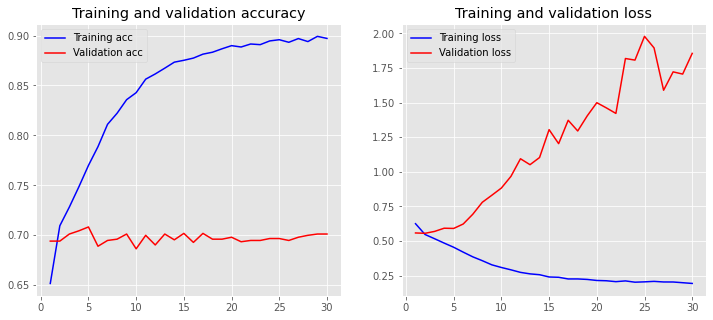

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


